1. [docTR](#docTR)
2. [PaddleOCR](#PaddleOCR)
3. [EasyOCR](#EasyOCR)
4. [Tesseract](#Tesseract)

## docTR

```bash
pip install "python-doctr[torch,viz]" # torch torchvision
```

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

from doctr.io import DocumentFile
from doctr.models import ocr_predictor

In [20]:
doc = DocumentFile.from_pdf("file.pdf")
print(f"Number of pages: {len(doc)}")

Number of pages: 9


In [37]:
predictor = ocr_predictor(det_arch="db_resnet50", pretrained=True)

In [38]:
predictor

OCRPredictor(
  (det_predictor): DetectionPredictor(
    (pre_processor): PreProcessor(
      (resize): Resize(output_size=(1024, 1024), interpolation='bilinear', preserve_aspect_ratio=True, symmetric_pad=True)
      (normalize): Normalize(mean=(0.798, 0.785, 0.772), std=(0.264, 0.2749, 0.287))
    )
    (model): DBNet(
      (feat_extractor): IntermediateLayerGetter(
        (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (layer1): Sequential(
          (0): Bottleneck(
            (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), p

In [1]:
result = predictor(doc)
# result.show()

NameError: name 'predictor' is not defined

In [40]:
string_result = result.render()
print(string_result)

Omkyda
fpoxod yepe3
Kabenb, npoBod
0003Ha-
yeHue
mpyoy
no npoekmy
nponoxeHo
Kabeng,
npo-
npoboda
Hayano
KoHeu
0003Ha- no duamemp cmaH- dnuHa, mAXHOU
KonuyecmBo, dnuHa,
KonuyecmBo, dnuHa,
dapmy,
9WUK No Mapka YUCAO U
Mapka YUCAO U
yeHue MM M
ceyewue XUA M
ceyewue XUA M
K1.1
A1.1
A1.2
16 2
KICH2/A) -FRLS 1x2x0,5 2
K1.2
A1.1
A13
16 2
KACH2/A) -FRLS 1x2x0,5 2
y4.11
AP1.2
ABE1
20 75
BBFH2/A) -FRLS 2x6 75
y4.12
AP13
ABE2
20 65
BBFw2/A) -FRLS 2x6 65
y4.13
AP1.2
ABE3
20 55
BBFH2/A) -FRLS 2x6 55
y4.14
AP1.2
ABE4
20 75
BBFH2/A) -FRLS 2x6 61
y4.15
AP1.2
ABE5
20 75
BBFW2/A) -FRLS 2x6 51
y4.16
AP1.2
ABE6
20 57
BBFw2/A) -FRLS 2x6 41
y4.1.7
AP13
NE1.1-ME13
20 35
BBFw2/A) -FRLS 2x6 35
K1.3
A13
NlozodHa9 cmaH4uR 1
16 2
KCBBIAI-LS 2x0,5 2
K14 No2odHaA cmaH4uR 1 Aamyuku Bempa U doxdg
16 20
KCBBIAI-LS 2x0,5 20
K1.5
A1.1
PRO-1.1
20 2
KICH2/AI- FRLS 4x2x0,5 2
K16
A1.1
LT.1
16 2
KCBBIAI-LS 4x0,5 2
K2.1
A2.1
A2.2
16 2
KICH2/A) -FRLS 1x2x0,5 2
K2.2
A2.1
A2.3
16 2
KICH2/A) -FRLS 1x2x0,5 2
y4.2.1
AP2.2
ABE7
20 5

In [33]:
from doctr.models import recognition_predictor
predictor = recognition_predictor('parseq')
print(predictor.model.cfg['vocab'])

0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~°£€¥¢฿àâéèêëîïôùûüçÀÂÉÈÊËÎÏÔÙÛÜÇ


Нет предобученной модели распознавания текста, которая поддерживает русский язык, но по ббоксам хорошо бьет
можно дообучить свою

## PaddleOCR

In [2]:
import fitz  # PyMuPDF
import os

def pdf_to_jpg(pdf_path, output_folder):
    pdf_document = fitz.open(pdf_path)

    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for page_num in range(len(pdf_document)):
        page = pdf_document.load_page(page_num)
        pix = page.get_pixmap()
        img_path = os.path.join(output_folder, f"page_{page_num + 1}.jpg")
        pix.save(img_path)

    print(f"Страницы PDF-файла успешно сохранены в папку {output_folder}")

pdf_path = "file.pdf"
output_folder = "test"
pdf_to_jpg(pdf_path, output_folder)


Страницы PDF-файла успешно сохранены в папку test


In [15]:
# pip install paddlepaddle paddleocr
from paddleocr import PaddleOCR, draw_ocr

ocr = PaddleOCR(lang="ru") # The model file will be downloaded automatically when executed for the first time
img_path ='test/page_1.jpg'
result = ocr.ocr(img_path)
# Recognition and detection can be performed separately through parameter control
# result = ocr.ocr(img_path, det=False)  Only perform recognition
# result = ocr.ocr(img_path, rec=False)  Only perform detection
for line in result:
    print(line)


[2025/05/01 21:21:28] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\Serg/.paddleocr/whl\\det\\ml\\Multilingual_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\Serg/.paddleocr/whl\\rec\\cyrillic\\cyrillic_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image

In [16]:
result

[[[[[530.0, 24.0], [569.0, 24.0], [569.0, 38.0], [530.0, 38.0]],
   ('Dnkyd', 0.765326201915741)],
  [[[736.0, 24.0], [774.0, 24.0], [774.0, 38.0], [736.0, 38.0]],
   ('охо', 0.9587458968162537)],
  [[[977.0, 21.0], [1020.0, 24.0], [1019.0, 38.0], [976.0, 35.0]],
   ('Kgteab.', 0.8522378206253052)],
  [[[1023.0, 25.0], [1063.0, 22.0], [1064.0, 35.0], [1024.0, 38.0]],
   ('gоо', 0.7425498962402344)],
  [[[368.0, 43.0], [412.0, 43.0], [412.0, 55.0], [368.0, 55.0]],
   ('Doosh-', 0.7189545631408691)],
  [[[373.0, 58.0], [408.0, 58.0], [408.0, 70.0], [373.0, 70.0]],
   ('чеHце', 0.6969983577728271)],
  [[[1068.0, 53.0], [1126.0, 53.0], [1126.0, 65.0], [1068.0, 65.0]],
   ('долоkен', 0.6328335404396057)],
  [[[370.0, 71.0], [412.0, 71.0], [412.0, 84.0], [370.0, 84.0]],
   ('Rdden.', 0.6446942090988159)],
  [[[463.0, 80.0], [505.0, 83.0], [504.0, 97.0], [462.0, 94.0]],
   ('Hчo', 0.7636852860450745)],
  [[[599.0, 83.0], [633.0, 83.0], [633.0, 95.0], [599.0, 95.0]],
   ('Rонец', 0.65052056312

In [17]:
from PIL import Image
result = result[0]
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores, font_path='./fonts/simfang.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')


## EasyOCR

In [18]:
# pip install easyocr
import easyocr
reader = easyocr.Reader(['ru'], gpu=False) # this needs to run only once to load the model into memory
# reader.readtext('test/page_1.jpg', detail=0)
easy_data = reader.readtext('test/page_1.jpg')

[2025-05-01 21:28:07,368] [ WARNING] easyocr.py:71 - Using CPU. Note: This module is much faster with a GPU.
d:\frolic\stroyka\free-ocr\free-ocr-comparison\venv\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


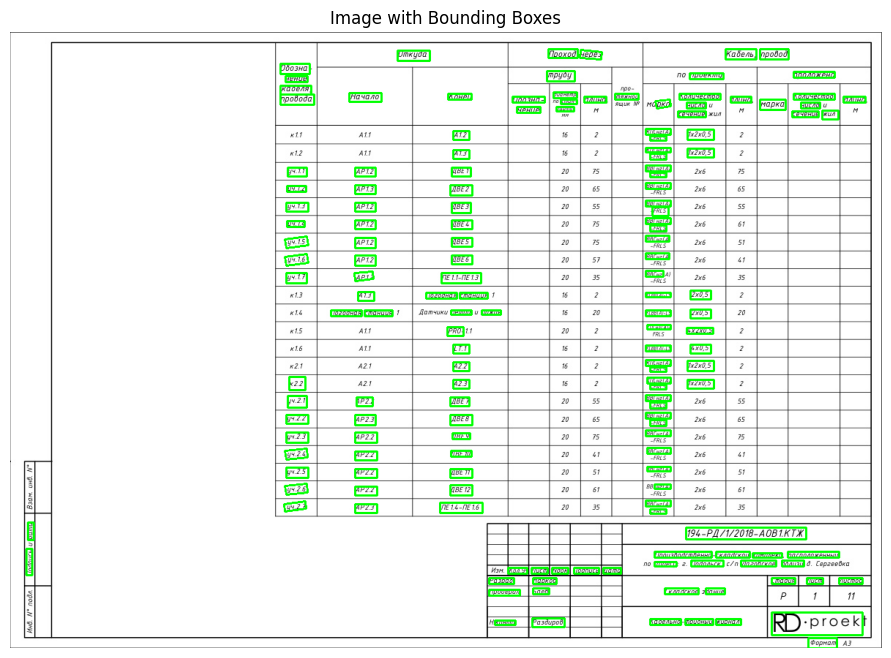

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('test/page_1.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

for bbox, text, confidence in easy_data:
    pts = np.array(bbox, dtype=np.int32)
    image = cv2.polylines(image, [pts], isClosed=True, color=(0, 255, 0), thickness=2)

plt.figure(figsize=(12, 8))
plt.imshow(image)
plt.axis('off')
plt.title('Image with Bounding Boxes')
plt.show()


## Tesseract

In [6]:
from PIL import Image
import pytesseract
import os
os.environ['TESSDATA_PREFIX'] = 'D:/frolic/stroyka/free-ocr/free-ocr-comparison/tesseract/tessdata'


pytesseract.pytesseract.tesseract_cmd = 'D:/frolic/stroyka/free-ocr/free-ocr-comparison/tesseract/tesseract.exe'

img = Image.open('./test/page_1.jpg')
text = pytesseract.image_to_string(img, lang='rus')
print(text)


оан ой К

одлась ч дата.

Г подя

‘откуде проход черех `кобель, провод
аы о проскт проложено
провода ‘Начало Конай Обозна - | ле свох. | длина, | пажной `Количество, | длона, Количество, | длина,
к аи л2 в | 2 ка лакоя |
а2 АН л в | г яа акоя [г
я И лее ® | = ее н | я
Р яя лвг ® | = ее н |
Р лРт2 _двЕ5 ® | » ЕС, КАРЯ я
лв АРа ‘двеб ® | ” ЕС27 НАР т
уча АРа ПЕП-ПЕТЯ ® | = СО э
о я Тесейня анн “ | › воко] — гоя | 2
и | птеноня стоныя Г | дочачи ееро и дотон * | ® н] 2ея |
5 а ‘Рно-1т @ | 2 "щие| ак5 | 2
и я еп * | : ] сня | ®
к2! А2 л22 ® | 2 КА лекоя | 2
22 А2 л23 ® | 2 КА лекоя | 2
Р легг вЕ7 п | ® а8о 5
22 е2з Р п | & яя | &
2 аггг ее ® | = ®е | я
че у ое ® | “ ее н |
25 яг вел ® | я ее н | я
194-РД/1/20189-АОВ1КТЖ
Просводевнеселаено кониек,восогоненный
_Изм. |Коа 34 Лист| ноок | Лодпись [ Дата| ыы аы
ее [ ста о [ ли
ост воей снеосае че —аа ашЕ
еча ее кеснстныноо — | ) -ргоек!

ойй аЕ




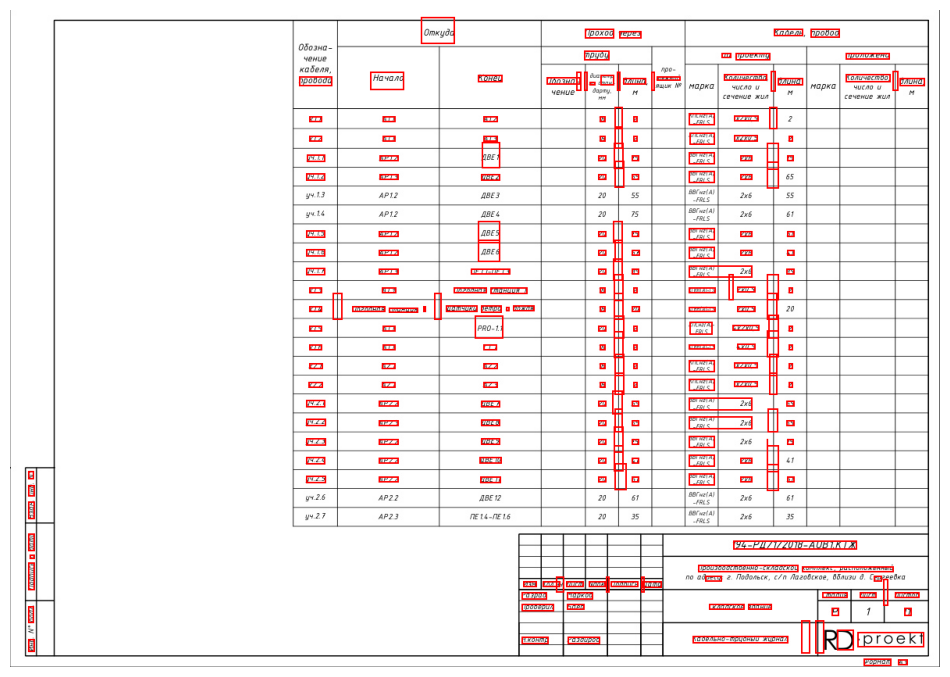

In [28]:
from PIL import Image, ImageDraw
import pytesseract
import matplotlib.pyplot as plt

img = Image.open('./test/page_1.jpg')

data = pytesseract.image_to_data(img, lang='rus', output_type=pytesseract.Output.DICT)

img_with_boxes = img.copy()
draw = ImageDraw.Draw(img_with_boxes)

n_boxes = len(data['text'])
for i in range(n_boxes):
    word = data['text'][i].strip()
    if word:
        x, y, w, h = data['left'][i], data['top'][i], data['width'][i], data['height'][i]
        draw.rectangle([x, y, x + w, y + h], outline='red', width=2)

plt.figure(figsize=(12, 10))
plt.imshow(img_with_boxes)
plt.axis('off')
plt.show()
